# Import Modules

In [3]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt

# Defining global variables

In [4]:
# V1 Base URL
global_url_v1_modules = "https://registry.terraform.io/v1/modules"
global_url_v1_provider = "https://registry.terraform.io/v1/providers"

# V2 Base URL
global_url_v2_modules = "https://registry.terraform.io/v2/modules"
global_url_v2_provider = "https://registry.terraform.io/v2/providers"

# GitHub Repository URL for Providers
global_url_github_provider_aws = "hashicorp/terraform-provider-aws"
global_url_github_provider_azurerm = "hashicorp/terraform-provider-azurerm"
global_url_github_provider_google = "hashicorp/terraform-provider-google"

global_url_github_api = "https://api.github.com"

# General functions

In [5]:
# Get JSON data from URL
def get_json_data(url):
    response = requests.get(url)
    data = json.loads(response.text)
    return data

In [6]:
def v1_get_pagination(url):
    data = get_json_data(url)
    return data['meta']

In [7]:
def get_pagination_v1_from_json(data):
    return data['meta']

In [8]:
# Returns from the given URL the pagination data from JSON
def v2_get_pagination(url):
    data = get_json_data(url)
    return data['meta']['pagination']

In [9]:
def v1_next_offset_from_url(url):
    meta_data = v1_get_pagination(url)
    return meta_data['next_offset']

In [10]:
def next_offset_from_json(data):
    return data['next_offset']

In [11]:
# NOTE: Please use number+=15
def get_page_v1(url, number):
    url = url + "?offset=" + str(number)
    response = requests.get(url)
    data = json.loads(response.text)
    return data

get_page_v1(global_url_v1_modules, 0)

{'meta': {'limit': 15,
  'current_offset': 0,
  'next_offset': 15,
  'next_url': 'https:///v1/modules?offset=15'},
 'modules': [{'id': 'GoogleCloudPlatform/lb-http/google/6.3.0',
   'owner': '',
   'namespace': 'GoogleCloudPlatform',
   'name': 'lb-http',
   'version': '6.3.0',
   'provider': 'google',
   'provider_logo_url': '/images/providers/google-cloud.svg',
   'description': 'Modular Global HTTP Load Balancer for GCE using forwarding rules.',
   'source': 'https://github.com/GoogleCloudPlatform/terraform-google-lb-http',
   'tag': 'v6.3.0',
   'published_at': '2022-07-29T18:16:07.22478Z',
   'downloads': 482856,
   'verified': True},
  {'id': 'terraform-aws-modules/vpc/aws/3.14.2',
   'owner': '',
   'namespace': 'terraform-aws-modules',
   'name': 'vpc',
   'version': '3.14.2',
   'provider': 'aws',
   'provider_logo_url': '/images/providers/aws.png',
   'description': 'Terraform module which creates VPC resources on AWS 🇺🇦',
   'source': 'https://github.com/terraform-aws-module

# Providers

## Provider Visualization

/var/folders/b3/xpf5q6kd44gds4y7g83j7yyh0000gn/T/ipykernel_18372/968067051.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_provider = df_provider.append(aws_downloads, ignore_index=True)
/var/folders/b3/xpf5q6kd44gds4y7g83j7yyh0000gn/T/ipykernel_18372/968067051.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_provider = df_provider.append(azurerm_downloads, ignore_index=True)
/var/folders/b3/xpf5q6kd44gds4y7g83j7yyh0000gn/T/ipykernel_18372/968067051.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_provider = df_provider.append(google_downloads, ignore_index=True)


<AxesSubplot:ylabel='name'>

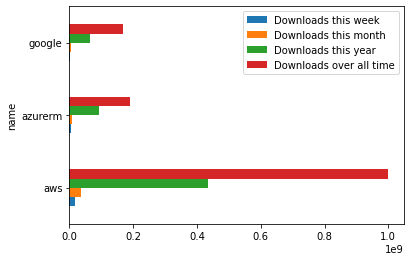

In [20]:
# There is no API endpoint to get the detailed downloads metrics of all provider
# So, the download metrics of the aws, google and azurerm are collected manually from the website
# Source date: 16/08/2022
aws_downloads = {'name': 'aws',
                'Downloads this week': 18300000,
                'Downloads this month': 37300000,
                'Downloads this year': 435200000,
                'Downloads over all time': 1000000000}

azurerm_downloads = {'name': 'azurerm',
                'Downloads this week': 4400000,
                'Downloads this month': 8700000,
                'Downloads this year': 93600000,
                'Downloads over all time': 191400000} 

google_downloads = {'name': 'google',
                'Downloads this week': 2600000,
                'Downloads this month': 4800000,
                'Downloads this year': 65600000,
                'Downloads over all time': 167500000} 

df_provider = pd.DataFrame()
df_provider = df_provider.append(aws_downloads, ignore_index=True)
df_provider = df_provider.append(azurerm_downloads, ignore_index=True)
df_provider = df_provider.append(google_downloads, ignore_index=True)

df_provider.plot(x='name', y=['Downloads this week', 'Downloads this month', 'Downloads this year', 'Downloads over all time'], kind='barh')

# Modules

## Module functions

In [13]:
def v1_get_modules_from_provider(url, provider):
    local_list_modules = []
    # set start URL
    url = url + "?provider=" + str(provider)
    while True:
        # get JSON data from URL
        data = get_json_data(url)

        # get meta data header from current URL
        page_meta_data = get_pagination_v1_from_json(data)

        # if there is a next offset, get the modules
        if "next_offset" in page_meta_data:
            # get the next offset from loaded meta data
            next_offset = next_offset_from_json(page_meta_data)

            # append the modules to the local list
            for module in data['modules']:
                local_list_modules.append(module)

            # update the url with the next offset
            url = global_url_v1_modules + "?provider=" + str(provider) + "&offset=" + str(next_offset)
        # if there is no next offset, break the loop
        else:
            # attend the displayed modules in the last page too
            for module in data['modules']:
                local_list_modules.append(module)

            break
            
    return local_list_modules

In [14]:
def get_modules_v2(url, pages):
    local_list_modules = []
    for i in range(pages):
        url_page = url + "?page%5Bnumber%5D=" + str(i+1) + "&page%5Bsize%5D=15"
        data = get_json_data(url_page)
        print(i)
        # convert json data to list
        for item in data['data']:
            local_list_modules.append(item)

    return local_list_modules

## Visualization

/var/folders/b3/xpf5q6kd44gds4y7g83j7yyh0000gn/T/ipykernel_18372/3913873407.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_modules = df_modules.append(aws_modules, ignore_index=True)
/var/folders/b3/xpf5q6kd44gds4y7g83j7yyh0000gn/T/ipykernel_18372/3913873407.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_modules = df_modules.append(azurerm_modules, ignore_index=True)
/var/folders/b3/xpf5q6kd44gds4y7g83j7yyh0000gn/T/ipykernel_18372/3913873407.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_modules = df_modules.append(google_modules, ignore_index=True)


<AxesSubplot:ylabel='name'>

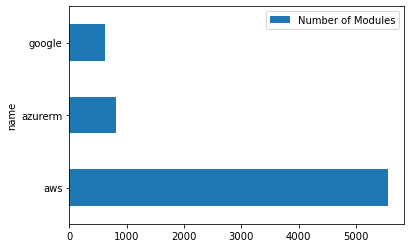

In [15]:
aws_modules = {
    'name': 'aws',
    'Number of Modules': len(v1_get_modules_from_provider(global_url_v1_modules, "aws"))
}
azurerm_modules = {
    'name': 'azurerm',
    'Number of Modules': len(v1_get_modules_from_provider(global_url_v1_modules, "azurerm"))
}
google_modules = {
    'name': 'google',
    'Number of Modules': len(v1_get_modules_from_provider(global_url_v1_modules, "google"))
}

df_modules = pd.DataFrame()
df_modules = df_modules.append(aws_modules, ignore_index=True)
df_modules = df_modules.append(azurerm_modules, ignore_index=True)
df_modules = df_modules.append(google_modules, ignore_index=True)

df_modules.plot(x='name', y=['Number of Modules'], kind='barh')

# GitHub metrics

In [16]:
json_data_aws = get_json_data(global_url_github_api + "/repos/" + global_url_github_provider_aws)
json_data_google = get_json_data(global_url_github_api + "/repos/" + global_url_github_provider_google)
json_data_azurerm = get_json_data(global_url_github_api + "/repos/" + global_url_github_provider_azurerm)

In [17]:
df = pd.DataFrame()
df = df.append(json_data_aws, ignore_index=True)
df = df.append(json_data_azurerm, ignore_index=True)
df = df.append(json_data_google, ignore_index=True)

/var/folders/b3/xpf5q6kd44gds4y7g83j7yyh0000gn/T/ipykernel_18372/653868864.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(json_data_aws, ignore_index=True)
/var/folders/b3/xpf5q6kd44gds4y7g83j7yyh0000gn/T/ipykernel_18372/653868864.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(json_data_azurerm, ignore_index=True)
/var/folders/b3/xpf5q6kd44gds4y7g83j7yyh0000gn/T/ipykernel_18372/653868864.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(json_data_google, ignore_index=True)


## Visualization

<AxesSubplot:ylabel='name'>

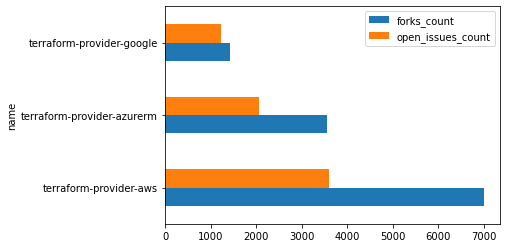

In [18]:
# plot number of stars, forks and open issues in horizontal bar chart
df.plot(x='name', y=['forks_count','open_issues_count'], kind='barh')